<a href="https://colab.research.google.com/github/xueweichen0110/rainforest_kaggle/blob/main/rainforest_aai_gglm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# To use glmm model to train audio files containing mixed species. 

##Steps:

1.   Set up the Environment, i.e. install the required softwares etc
2.   Download the datasets
3.   Read flac files
4.   Train data sets with package
5.   Evaluate the model performance
6.   List *item*
7.   List item
8.   List item
9.   List item

**ref** https://royalsocietypublishing.org/doi/full/10.1098/rsif.2018.0940#d3e1885

##1 Set up the Environment

##Install packages

In [ ]:
!pip install rpy2

## Installing the [Kaggle API](https://github.com/Kaggle/kaggle-api) in Colab

In [14]:
!pip install kaggle

### Authenticating with Kaggle using kaggle.json

Navigate to https://www.kaggle.com. Then go to the [Account tab of your user profile](https://www.kaggle.com/me/account) and select Create API Token. This will trigger the download of kaggle.json, a file containing your API credentials.

Then run the cell below to upload kaggle.json to your Colab runtime.

In [16]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 65 bytes


### Using the Kaggle API

For a more complete list of what you can do with the API, visit https://github.com/Kaggle/kaggle-api.

### Listing competitions

In [17]:
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes        105           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes        214           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        326           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       2778           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      21502           False  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started  Knowledge       5532           False  
connectx

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
!pip install soundfile

## 2 Downloading the datasets

In [30]:
!pwd

/content


In [20]:
!kaggle competitions download -c rfcx-species-audio-detection

 97% 271M/279M [00:02<00:00, 141MB/s]
100% 279M/279M [00:02<00:00, 120MB/s]
 99% 267M/269M [00:02<00:00, 130MB/s]
100% 269M/269M [00:02<00:00, 126MB/s]
 97% 266M/275M [00:02<00:00, 145MB/s]
100% 275M/275M [00:02<00:00, 132MB/s]
 96% 265M/277M [00:02<00:00, 166MB/s]
100% 277M/277M [00:02<00:00, 108MB/s]
 97% 261M/269M [00:02<00:00, 123MB/s]
100% 269M/269M [00:02<00:00, 122MB/s]
 95% 256M/268M [00:02<00:00, 134MB/s]
100% 268M/268M [00:02<00:00, 125MB/s]
 93% 256M/274M [00:02<00:00, 91.6MB/s]
100% 274M/274M [00:02<00:00, 128MB/s] 
 94% 257M/274M [00:02<00:00, 128MB/s]
100% 274M/274M [00:02<00:00, 131MB/s]
 95% 257M/270M [00:02<00:00, 130MB/s]
100% 270M/270M [00:02<00:00, 126MB/s]
 96% 256M/266M [00:02<00:00, 92.6MB/s]
100% 266M/266M [00:02<00:00, 101MB/s] 
 99% 266M/270M [00:04<00:00, 36.9MB/s]
100% 270M/270M [00:04<00:00, 61.6MB/s]
100% 268M/269M [00:04<00:00, 40.9MB/s]
100% 269M/269M [00:04<00:00, 60.4MB/s]
 96% 260M/271M [00:04<00:00, 51.3MB/s]
100% 271M/271M [00:04<00:00, 61.1MB/s]
 9

In [39]:
!unzip \*.zip  && rm *.zip


Archive:  02-63.tfrec.zip
  inflating: 02-63.tfrec             

Archive:  00f3b3c1e.flac.zip
  inflating: 00f3b3c1e.flac          

Archive:  00b404881.flac.zip
  inflating: 00b404881.flac          

Archive:  04-63.tfrec.zip
  inflating: 04-63.tfrec             

Archive:  00204008d.flac.zip
  inflating: 00204008d.flac          

Archive:  17-148.tfrec.zip
  inflating: 17-148.tfrec            

Archive:  003b04435.flac.zip
  inflating: 003b04435.flac          

Archive:  11-63.tfrec.zip
  inflating: 11-63.tfrec             

Archive:  00d442df7.flac.zip
  inflating: 00d442df7.flac          

Archive:  009aa1c8f.flac.zip
  inflating: 009aa1c8f.flac          

Archive:  019db5220.flac.zip
  inflating: 019db5220.flac          

Archive:  00-148.tfrec.zip
  inflating: 00-148.tfrec            

Archive:  03-148.tfrec.zip
  inflating: 03-148.tfrec            

Archive:  02c30604d.flac.zip
  inflating: 02c30604d.flac          

Archive:  09-148.tfrec.zip
  inflating: 09-148.tfrec           

In [41]:
!mkdir drive/MyDrive/kaggle

mkdir: cannot create directory ‘drive/MyDrive/kaggle’: File exists


In [47]:
!mv *.flac drive/MyDrive/kaggle/

In [48]:
!mv *.tfrec drive/MyDrive/kaggle/

In [49]:
!mv *.csv drive/MyDrive/kaggle/

##3 Read flac files 

ref: https://www.kaggle.com/rtatman/how-to-create-spectrograms-from-flac-files

In [23]:
import numpy as np
import soundfile as sf
import scipy.signal as signal
import matplotlib.pyplot as plt

In [39]:
#!ls rainforest_kaggle/
#!mkdir rainforest_kaggle
#help('zipfile')
import glob
all_zips = glob.glob('*.zip')

In [51]:
# move data around
#!mv sample_submission.csv rainforest_kaggle/

mv: cannot stat 'sample_submission.csv': No such file or directory


In [42]:
import zipfile
for zip_file in all_zips:
  with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall('rainforest_kaggle')

In [25]:
data, samplerate = sf.read("000316da7.flac")


Text(0.5, 0, 'Time [sec]')

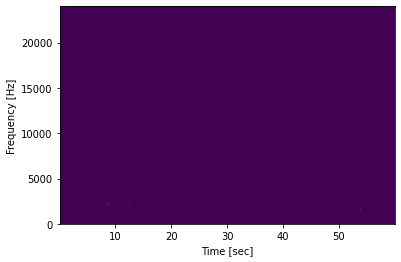

In [26]:
freq, time, Sxx = signal.spectrogram(data, samplerate, scaling='spectrum')
plt.pcolormesh(time, freq, Sxx)

# add axis labels
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')


ref: https://github.com/pasca15/Rainforest_Kaggle/blob/main/Preprocessing_audio.ipynb

**Read an Audio File**
In TensorFlow IO, class tfio.audio.AudioIOTensor allows you to read an audio file into a lazy-loaded IOTensor:




In [5]:
import os
file_list = []
for file in os.listdir("/content/drive/MyDrive/kaggle"):
    if file.endswith(".flac"):
      file_list.append(file)

In [8]:
!pip install tensorflow-io


In [7]:
%cd drive/MyDrive/kaggle/

/content/drive/MyDrive/kaggle


**Get the file in a list**

Create a list of required files
Input
a File list

Output
- raw: a list of numpy arrays for the raw files
- trim: a list of numpy arrays for the files with noise trimmed
- add: a list of numpy arrays for the files with noise added
- pitch: a list of numpy arrays for the files with pitch shifted
- pitch_rev: a list of numpy arrays for the files with pitch shifted in a different direction
- time: a list of numpy array for the files with time stretched

In [9]:
import tensorflow as tf
import tensorflow_io as tfio
import numpy
import librosa

def tensor_to_numpy(input_file):
  tensor = tf.cast(input_file, tf.float32) / 32768.0
  return tensor.numpy()

raw = []
trim = []
add = []
pitch = []
pitch_rev = []
time = []  
for i in file_list:
  audio = tfio.audio.AudioIOTensor(i)
  audio_slice = audio[100:]
  audio_tensor = tf.squeeze(audio_slice, axis=[-1])
  tensor = tf.cast(audio_tensor, tf.float32) / 32768.0
  raw.append(tensor.numpy())
  wav, sr = librosa.load(i, sr=None)
  #stretch the time
  factor = 0.4
  wav_time_stch = librosa.effects.time_stretch(wav, factor)
  time.append(tensor_to_numpy(wav_time_stch))
  #trim the noise
  position = tfio.experimental.audio.trim(tensor, axis=0, epsilon=0.1)

  start = position[0]
  stop = position[1]

  processed = wav_time_stch[start:stop]
  trim.append(tensor_to_numpy(processed))

  #add the noise
  wav_n = wav_time_stch + 0.009*numpy.random.normal(0,1,len(wav_time_stch))
  add.append(tensor_to_numpy(wav_n))

  #shift the pitch
  wav_pitch_stch = librosa.effects.pitch_shift(wav_time_stch,sr, n_steps=-5)
  pitch.append(tensor_to_numpy(wav_pitch_stch))

  wav_pitch_stch_reverse = librosa.effects.pitch_shift(wav_time_stch,sr, n_steps=5)
  pitch_rev.append(tensor_to_numpy(wav_pitch_stch_reverse))

In [11]:
import numpy as np


In [12]:
print(np.shape(raw),np.shape(trim),np.shape(pitch),np.shape(pitch_rev),np.shape(time))


(40, 2879900) (40,) (40, 7200768) (40, 7200768) (40, 7200768)


In [13]:
import pandas as pd

In [14]:
record_ids = list(map(lambda it: it.strip('.flac'), file_list))

In [114]:
print(record_ids)

In [3]:
#train_df = pd.DataFrame(time[:10,], columns= record_ids[:10])
#tbd...

NameError: ignored

## 4 Read annotation files

import csv
sample_sub_fn = 'rainforest_kaggle/sample_submission.csv'
train_fp_fn = 'rainforest_kaggle/train_fp.csv'
train_tp_fn = 'rainforest_kaggle/train_tp.csv'

In [ ]:
!ls

In [16]:

import glob
import pandas as pd


all_files = glob.glob("*.csv")

li = []

for filename in all_files:
    print(filename)
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)
  

sample_submission.csv
train_fp.csv
train_tp.csv


In [17]:
all_files

['sample_submission.csv', 'train_fp.csv', 'train_tp.csv']

In [19]:
print(np.shape(li[0]), np.shape(li[1]), np.shape(li[2]))

(1992, 25) (7781, 7) (1216, 7)


In [20]:
columns = li[2].columns
data = li[2]


# Train the model 

ref https://www.kaggle.com/ojwatson/mixed-models

##Browse the data distribution

In [21]:
!pip install statsmodels 


In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from math import sqrt

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


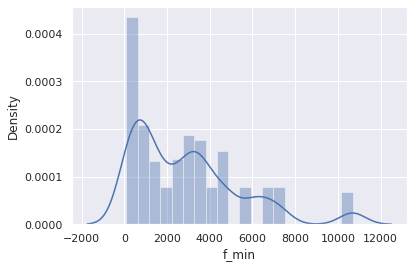

In [44]:
sns.distplot(data.f_min)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


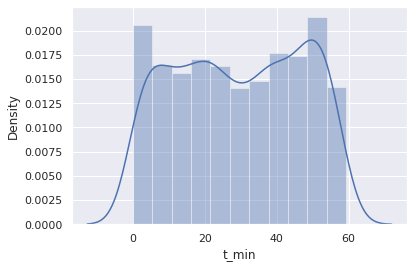

In [45]:
sns.distplot(data.t_min)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


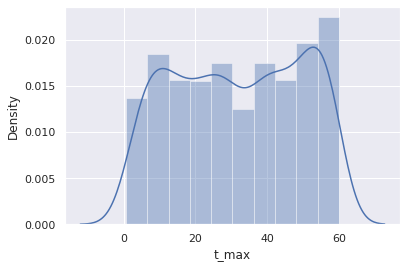

In [46]:
sns.distplot(data.t_max)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


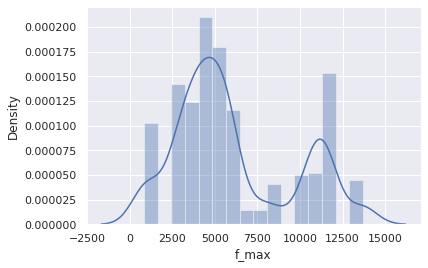

In [47]:
sns.distplot(data.f_max)
plt.show()

In [ ]:
## Scale the input variables

In [55]:
from sklearn import preprocessing
data["f_min_scaled"] = preprocessing.scale(data.f_min)
data["f_max_scaled"] = preprocessing.scale(data.f_max)
data["t_min_scaled"] = preprocessing.scale(data.t_min)
data["t_max_scaled"] = preprocessing.scale(data.t_max)


In [56]:
#construct the model, use sontype_id as group
md = smf.mixedlm("species_id ~ t_min_scaled + f_min_scaled + t_max_scaled + f_max_scaled", data, groups=data["songtype_id"], 
                 re_formula="~t_min_scaled + f_min_scaled + t_max_scaled + f_max_scaled")
mdf = md.fit()
print(mdf.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/mixed_linear_model.py:2059: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  ConvergenceWarning)


                   Mixed Linear Model Regression Results
Model:                    MixedLM       Dependent Variable:       species_id
No. Observations:         1216          Method:                   REML      
No. Groups:               2             Scale:                    36.6612   
Min. group size:          128           Likelihood:               -3917.7470
Max. group size:          1088          Converged:                Yes       
Mean group size:          608.0                                             
----------------------------------------------------------------------------
                                 Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
----------------------------------------------------------------------------
Intercept                        13.936    1.760  7.920 0.000  10.487 17.385
t_min_scaled                    -25.952    9.838 -2.638 0.008 -45.235 -6.669
f_min_scaled                      1.749    1.456  1.201 0.230  -1.105  4.602
t_max_scaled       

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/mixed_linear_model.py:2115: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))


# plot the predictions


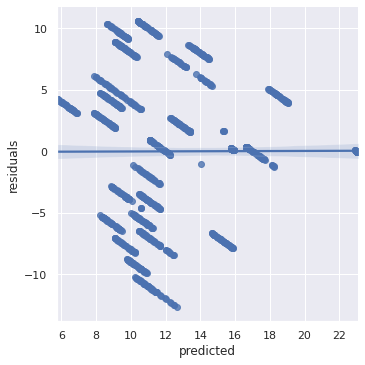

In [57]:
performance = pd.DataFrame()
performance["residuals"] = mdf.resid.values
performance["t_min_scaled"] = data.t_min_scaled
performance["f_min_scaled"] = data.f_min_scaled
performance["t_max_scaled"] = data.t_max_scaled
performance["f_max_scaled"] = data.f_max_scaled
performance["predicted"] = mdf.fittedvalues

sns.lmplot(x = "predicted", y = "residuals", data = performance)

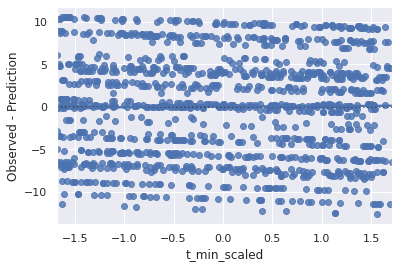

In [59]:
ax = sns.residplot(x = "t_min_scaled", y = "residuals", data = performance, lowess=True)
ax.set(ylabel='Observed - Prediction')
plt.show()

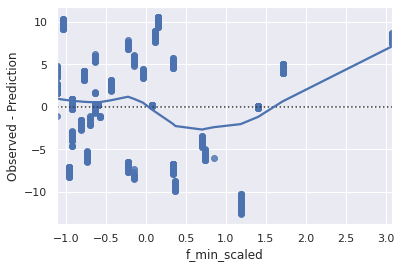

In [60]:
ax = sns.residplot(x = "f_min_scaled", y = "residuals", data = performance, lowess=True)
ax.set(ylabel='Observed - Prediction')
plt.show()

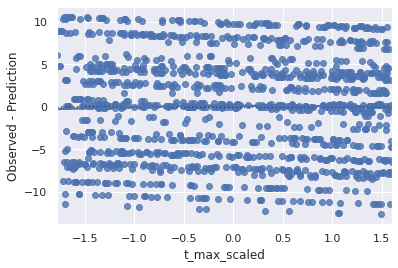

In [61]:
ax = sns.residplot(x = "t_max_scaled", y = "residuals", data = performance, lowess=True)
ax.set(ylabel='Observed - Prediction')
plt.show()

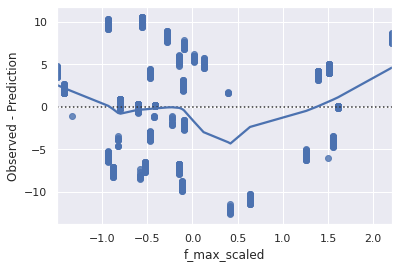

In [62]:
ax = sns.residplot(x = "f_max_scaled", y = "residuals", data = performance, lowess=True)
ax.set(ylabel='Observed - Prediction')
plt.show()

# 6 Evaluate the performace of the model

In [63]:
y = data.species_id


In [64]:
y_predict = mdf.fittedvalues
RMSE = sqrt(((y-y_predict)**2).values.mean())
results = pd.DataFrame()
results["Method"] = ["Mixed_Random_Slopes"]
results["RMSE"] = RMSE
results

,Method,RMSE
0,Mixed_Random_Slopes,6.037396
